<a href="https://colab.research.google.com/github/edward0210/test/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image

In [ ]:
(X_train, Y_train) , (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype(float)/255.0
Y_train = np_utils.to_categorical(Y_train)

X_test = X_test.astype(float)/255.0
Y_test = np_utils.to_categorical(Y_test)

num_classes = Y_test.shape[1]


In [ ]:
print(num_classes)

10


In [ ]:
###Model

#X = tf.keras.layers.InputLayer(shape=[32,32,3])
X = tf.keras.layers.Input(shape = [32,32,3])
H = tf.keras.layers.Convolution2D(32,kernel_size = 3,strides =(1,1),padding ='same',activation = 'relu')(X)
H = tf.keras.layers.MaxPooling2D()(H)
print(H.shape)
H = tf.keras.layers.Convolution2D(16,kernel_size =3, strides = (1,1), padding = 'same',activation = 'relu')(H)
H = tf.keras.layers.MaxPooling2D()(H)
H = tf.keras.layers.Convolution2D(8,kernel_size =3, strides = (1,1), padding = 'same',activation = 'relu')(H)
H = tf.keras.layers.MaxPooling2D()(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120,activation = 'swish',name ='fc1')(H) 
H = tf.keras.layers.Dense(60,activation = 'swish',name ='fc2')(H)
Y = tf.keras.layers.Dense(10,activation = 'softmax',name = 'fc3')(H)


model = tf.keras.models.Model(X,Y)

model.compile(loss='categorical_crossentropy',metrics='accuracy')


(None, 16, 16, 32)


In [ ]:
hist = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6525 - accuracy: 0.4002
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3256 - accuracy: 0.5228
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1946 - accuracy: 0.5752
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1119 - accuracy: 0.6044
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0428 - accuracy: 0.6303
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9909 - accuracy: 0.6490
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9485 - accuracy: 0.6653
Epoch 8/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9127 - accuracy: 0.6773
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8801 - accuracy: 0.6898
Epoch 10/10
1563/1563 [==============================] - 57s 37m

79/79 [==============================] - 2s 31ms/step - loss: 1.0038 - accuracy: 0.6946
test lossm test acc [1.0038142204284668, 0.694599986076355]


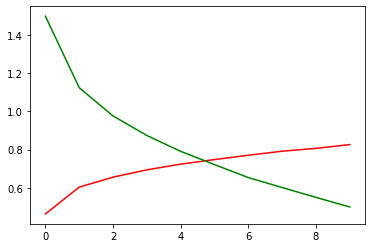

In [ ]:
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['loss'],'g')

pred = model.predict(X_test)
result = model.evaluate(X_test,Y_test,batch_size=128)
#result = pd.DataFrame(pred).round(2)

print('test lossm test acc',result)

plt.show()

In [ ]:
feat_extractor = tf.keras.models.Model(inputs=model.input,outputs=model.get_layer('fc2').output)

In [ ]:
features = feat_extractor.predict(X_train)

In [ ]:

tsne = TSNE().fit_transform(features)
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:

width = 3000
height =3000
max_dim = 100
full_image = Image.new('RGB', (width, height))
#print(X_test)
for idx, x in enumerate(X_test):

    tile = Image.fromarray(np.uint8(x * 255))
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

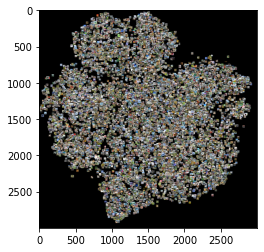

In [ ]:
plt.imshow(full_image)

In [ ]:
#full_image = full_image[:,:,::-1]
print(full_image.format)
#plt.imsave('d4.bmp',full_image)
full_image.save('d6.jpg')

None
